***
# Solution: Sentiment Analysis
***




*By Asmik Nalmpatian and Lisa Wimmer – for Intro to NLP*


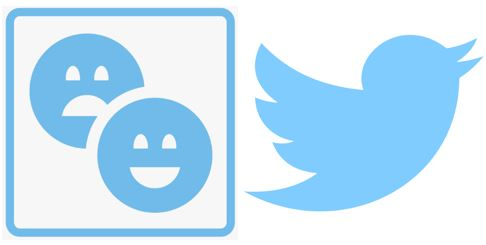

## Set-up


In [ ]:
# Install all required packages

install.packages("mlr3verse")
install.packages("ranger")

In [ ]:
# Load all required packages

library(mlr3verse)
library(ranger)

## Data

1. On the left command pane, move to the `Files` section.
2. Select 'Upload to the session storage'.
3. Upload the `data_sentiment_analysis.RDS` data from the course website (the data will vanish as soon as you terminate the colab session).

In [ ]:
data <- readRDS("data_sentiment_analysis.RDS")

head(data)

doc_id,label,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,⋯,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABaerbock15156546001,negative,4,1,3,2,0,4,0,8,⋯,0.112473379,0.00000000,0.00000000,0.0000000,0,0,0,0,0,0
ABaerbock15216341401,negative,4,4,2,1,0,6,0,10,⋯,-0.003193772,0.00000000,0.00000000,0.0000000,0,0,0,0,0,0
ABaerbock15283779001,negative,2,4,2,2,0,4,0,8,⋯,0.000000000,0.02946139,0.05326545,-0.3367238,0,0,0,0,0,0
ABaerbock15372868201,negative,3,4,8,0,1,5,0,9,⋯,0.161486073,0.00000000,0.00000000,0.0000000,0,0,0,0,0,0
ABaerbock15485148001,positive,3,4,2,2,1,3,0,10,⋯,0.144862763,0.00000000,0.00000000,0.0000000,0,0,0,0,0,0
ABaerbock15514725001,positive,0,3,0,1,2,6,0,10,⋯,-0.060960596,0.00000000,0.00000000,0.0000000,0,0,0,0,0,0


## Exercise 1: Perform Train-Test Split

In a first step, split the data into a training and a test set.

* Two thirds of observations should be used for training.
* You can achieve this by either creating a new variable by which you subset afterwards, or by sampling from the row indices.
* Don't forget to make your code reproducible.

*Solution*

In [ ]:
# Set seed for reproducibility

set.seed(1)

# Create splitting variable ...

data$is_train <- rbinom(nrow(data), 1, 2/3)

data_train <- data[is_train == 1]
data_test <- data[is_train == 0]

sapply(list(data_train, data_test), nrow)

[1] 816 399

In [ ]:
# Set seed for reproducibility

set.seed(1)

# ... or sample from the row indices

ind_train <- sample(data[, .I], 2/3 * nrow(data))
data_train <- data[ind_train]
data_test <- data[setdiff(data[, .I], ind_train)]

sapply(list(data_train, data_test), nrow)

[1] 810 405

## Exercise 2: Create Classification Task

Create an `mlr3` task object for sentiment analysis. Make sure the `doc_id` variable is not included in the features.

*Solution*

In [ ]:
# Create task

task <- mlr3::TaskClassif$new("my_task", data_train, target = "label")
task$set_col_roles("doc_id", "name")

task

<TaskClassif:my_task> (810 x 60)
* Target: label
* Properties: twoclass
* Features (59):
  - dbl (57): ADJ, ADP, ADV, AUX, CCONJ, DET, INTJ, NOUN, NUM, PART,
    PRON, PROPN, PUNCT, SCONJ, VERB, X, a, b, c, d, e, embedding_1,
    embedding_10, embedding_11, embedding_12, embedding_2, embedding_3,
    embedding_4, embedding_5, embedding_6, embedding_7, embedding_8,
    embedding_9, f, g, h, i, j, k, l, m, n, negation, negative, o, p,
    positive, q, r, s, t, u, v, w, x, y, z
  - int (2): is_train, n_emojis

## Exercise 3: Define and Train Learner

Instantiate and train a `learner` object. 

* Choose a *random forest* (check online or in the documentation if you need information). 
* You don't need to set any hyperparameters by yourself (though you can do so, of course).

In [ ]:
# Create random forest learner

learner <- mlr3::lrn("classif.ranger")

# Set hyperparameters if desired, e.g., 

learner$param_set$values$num.trees <- 200

# Inspect

learner

<LearnerClassifRanger:classif.ranger>
* Model: -
* Parameters: num.threads=1, num.trees=200
* Packages: ranger
* Predict Type: response
* Feature types: logical, integer, numeric, character, factor, ordered
* Properties: importance, multiclass, oob_error, twoclass, weights

In [ ]:
# Train learner

learner$train(task)

## Exercise 4: Evaluate Learner

Evaluate your learner's performance by 

* letting it predict on the test data,
* printing the confusion matrix,
* and computing accuracy as well as the true negative rate.

In [ ]:
# Predict

predictions <- learner$predict_newdata(data_test)

# Print confusion matrix

predictions$confusion

          truth
response   negative positive
  negative      293       54
  positive        9       49

In [ ]:
# Evaluate with given metrics

metrics <- list(
  mlr3::msr("classif.acc"),
  mlr3::msr("classif.tnr"))

predictions$score(metrics)

classif.acc classif.tnr 
  0.8444444   0.4757282

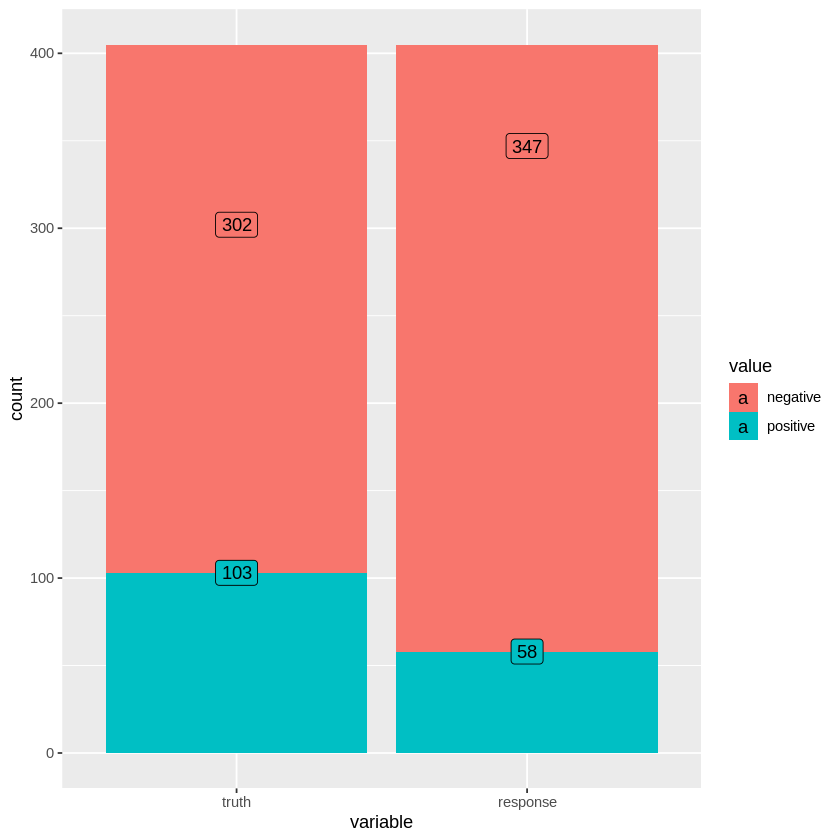

In [ ]:
# Bonus: plot

mlr3viz::autoplot(predictions)